## Linear SVM for Spam Email Classifier

### Objective :

    - To build a Linear Support Vector Machine model which will help in classifying the email as Spam/Ham. The dataset is taken from the UCI repository below:

https://archive.ics.uci.edu/ml/datasets/spambase

### 1. Import and Understand Data

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Importing the required librarires
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
spam_df = pd.read_csv('spam.txt', sep =',', header=None)
spam_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


     - There are 58 columns in the dataframe but without column headers. Column header names are available in the UCI repository as below :
https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

In [49]:
# Adding the column names from UCI repository
spam_df.columns = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"  ]
spam_df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [50]:
spam_df.shape

(4601, 58)

In [51]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

    - There are no missing values in the data.

In [52]:
## Find the data imbalance ratio 
sum(spam_df['spam'])/len(spam_df['spam'].index)*100

39.404477287546186

    - Spam ratio in the available dataset is around 40% which is pretty reasonable ratio to proceed

### 2 . Data Preperation

Steps involved in data preperation are :
    - Rescaling the variables
    - Split the data into train-test 
    
Rescaling is required so as to keep all the columns which has higher values (such as capital_run_length_longest, capital_run_length_total, etc ) in par with other columns.

In [53]:
# describe the columns 
spam_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [54]:
# split into X and Y 
X = spam_df.drop('spam', axis=1 )
y = spam_df['spam']

In [55]:
# scaling the features :
from sklearn.preprocessing import scale
X = scale(X)

In [56]:
# split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state=100)

In [57]:
print(y_test.mean())
print(y_train.mean())

0.41274438812454745
0.3860248447204969


### 3. Model Building

In [58]:
from sklearn.svm import SVC

# instantiate an object of class SVC()
# note that we are using cost C=1 which has default values
model = SVC(C=1) 

# fit the model
model.fit(X_train, y_train) 

# Predict the data 
y_pred = model.predict(X_test)

In [59]:
# Using the predicted data form Confusion Matrix 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_true= y_test, y_pred = y_pred)

array([[774,  37],
       [ 58, 512]])

In [60]:
from sklearn import metrics

# Print Accuracy of model 
print('accuracy', metrics.accuracy_score(y_test, y_pred))

# Print Precision 
print('precision', metrics.precision_score(y_test, y_pred)) 

# Print Recall 
print('recall', metrics.recall_score(y_test, y_pred))


accuracy 0.9312092686459088
precision 0.9326047358834244
recall 0.8982456140350877


In [61]:
# Print Specificity 
# Specificity = No of Actual No's correctly predicted/Total No of Actual No's 
# Specificity = TN/(TN+FP) 

print('specificity', 774/(774+37))

specificity 0.9543773119605425


     - The model which was built has around 93% accuracy, with specificity of 95%. Here Specificity denotes no of NO's(negatives) which is correctly predicted. So, here it is no of Ham's which are correctly classified as Ham's.
     - Sensitivity/Recall defines No of actual Yes's correctly predicted. Value is 89%, meaning 89% of Spam emails are correctly classified as spam

### K-Fold cross validation


    - Let's first run a simple k-fold cross validation to get a sense of the **average metrics** as computed over multiple *folds*. the easiest way to do cross-validation is to use the ```cross_val_score()``` function.

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

# Creating a KFold object with 5 folds 
folds = KFold(n_splits=5, shuffle=True, random_state=100)

# Instatiate the model with C=1 
model = SVC(C=1)


In [63]:
# folds object would split the data into 5 folds to
# Perform cross validation score 
# taking accuracy as scoring metric
cv_results = cross_val_score(model, X_train, y_train,cv = folds, scoring ='accuracy')

In [64]:
# cv_results will now have accuracy value for every data fold(5 in this case)
print(cv_results) 
# average of scores 
print(cv_results.mean())

[0.93167702 0.9068323  0.93944099 0.92546584 0.9378882 ]
0.9282608695652174


    - Mean accuracy for the model with hyperparameter cost value(C) = 1 is 92%. There might be other hyperparameter C values which might bring high accuracy in the model. 
    - To find optimal accuracy values and value of C, K-fold cross validation has to be run for different C values and compare every accuracy value of C among others 

### Grid Search to find optimal Hyperparameter C

    K-fold CV helps us compute average metrics over multiple folds, and that is the best indication of the 'test accuracy/other metric scores' we can have. 

    But we want to use CV to compute the optimal values of hyperparameters (in this case, the cost C is a hyperparameter). This is done using the ```GridSearchCV()``` method, which computes metrics (such as accuracy, recall etc.) 

    In this case, we have only one hyperparameter, though you can have multiple, such as C and gamma in non-linear SVMs. In that case, you need to search through a *grid* of multiple values of C and gamma to find the optimal combination, and hence the name GridSearchCV.

In [65]:
from sklearn.model_selection import GridSearchCV 

#defining C params 
params = {'C':[0.1, 1, 10, 100, 1000]} 

model = SVC() 

# set up grid search 
model_grid = GridSearchCV(estimator  = model, 
                          param_grid = params,
                          scoring    = 'accuracy',
                          cv         = folds,
                          verbose    = 1,
                          return_train_score = True)

model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   12.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [66]:
# results 

grid_results = pd.DataFrame(model_grid.cv_results_)
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.387325,0.033518,0.084327,0.006691,0.1,{'C': 0.1},0.909938,0.880435,0.920807,0.891304,...,0.901863,0.014279,5,0.908773,0.911879,0.907609,0.910714,0.906832,0.909161,0.001886
1,0.246364,0.021364,0.050678,0.001983,1,{'C': 1},0.931677,0.906832,0.939441,0.925466,...,0.928261,0.011801,1,0.945264,0.950699,0.947981,0.946817,0.944488,0.947050,0.002190
2,0.198223,0.002973,0.036813,0.001004,10,{'C': 10},0.934783,0.905280,0.931677,0.922360,...,0.927950,0.013558,2,0.967003,0.970885,0.968944,0.968944,0.965062,0.968168,0.001979
3,0.227475,0.011572,0.033071,0.000616,100,{'C': 100},0.919255,0.897516,0.916149,0.914596,...,0.917702,0.013889,3,0.986025,0.989130,0.987966,0.989519,0.987578,0.988043,0.001237
4,0.277314,0.024620,0.032027,0.005076,1000,{'C': 1000},0.908385,0.892857,0.903727,0.902174,...,0.905590,0.009129,4,0.993789,0.994953,0.995342,0.994953,0.994565,0.994720,0.000527


- mean_test_score and mean_train_score for all the C values should be plotted to see how the value differs

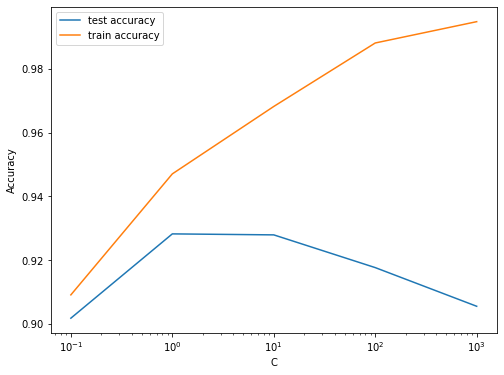

In [67]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(grid_results['param_C'], grid_results['mean_test_score'])
plt.plot(grid_results['param_C'], grid_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

    - The training accuracy is montonically increasing for the increase in value of C(after 1), but the test accuracy decreases gradually.
    - Higher the value of C, it tries to overfit the model. 

In [70]:
#best score 
bestscore = model_grid.best_score_ 
best_C    = model_grid.best_params_['C']

print(best_C, bestscore)

1 0.9282608695652174


- Best C value is 1 

In [71]:
#model with best value of C 
model = SVC(C=best_C) 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [72]:
# metrics
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))


accuracy 0.9312092686459088
precision 0.9326047358834244
recall 0.8982456140350877


## Optimising for Other Evaluation Metrics

In this case, we had optimised (tuned) the model based on overall accuracy, though that may not always be the best metric to optimise. For example, if you are concerned more about catching all spams (positives), you may want to maximise TPR or sensitivity/recall. If, on the other hand, you want to avoid classifying hams as spams (so that any important mails don't get into the spam box), you would maximise the TNR or specificity.

In [73]:
# specify params
params = {"C": [0.1, 1, 10, 100, 1000]}

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    # set up GridSearch for score metric
    clf = GridSearchCV(SVC(), 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    clf.fit(X_train, y_train)

    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.9282608695652174 at C = {'C': 1}


# Tuning hyper-parameters for precision
 The highest precision score is 0.9413910610639313 at C = {'C': 0.1}


# Tuning hyper-parameters for recall
 The highest recall score is 0.8906253117089488 at C = {'C': 10}




Thus, you can see that the optimal value of the hyperparameter varies significantly with the choice of evaluation metric.